# Documentation 

## Business Problem

Data collection from top journals for text mining on article title and abstracts.

**NOTE:** For more information about location of raw data files, result data files, please refer comments and the *Documentation.pdf*

In [4]:
# Importing required libraries for the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sb

### 1. Extracting journals according to SJR rank

Extracted top 25 journals (by SJR rank) for 6 fields: (Medicine, Health Policy, Pharmacy, Multidisciplinary, Nursing, Biochemistry.


##### Relevant links to download data files
 Medicine: https://nam12.safelinks.protection.outlook.com/?url=https%3A%2F%2Fwww.scimagojr.com%2Fjournalrank.php%3Fcategory%3D2701&data=05%7C01%7Cbkashyap1%40student.gsu.edu%7C0fb72741243e4620371408da929aad4a%7C704d822c358a47849a1649e20b75f941%7C0%7C0%7C637983490287354968%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C3000%7C%7C%7C&sdata=rW8cmhK%2FhT2P6Pw89C8YjZRmEGYfTeaSLLKyORDXN74%3D&reserved=0
 
 Health policy: https://nam12.safelinks.protection.outlook.com/?url=https%3A%2F%2Fwww.scimagojr.com%2Fjournalrank.php%3Fcategory%3D2719&data=05%7C01%7Cbkashyap1%40student.gsu.edu%7C0fb72741243e4620371408da929aad4a%7C704d822c358a47849a1649e20b75f941%7C0%7C0%7C637983490287511206%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C3000%7C%7C%7C&sdata=Jw5fZJu6taC8Y23jVy84zb9AJiefGzraIMQmJ21QUxw%3D&reserved=0
 
 Pharmacy: https://www.scimagojr.com/journalrank.php?area=3000 
 
 Nursing: https://www.scimagojr.com/journalrank.php?category=2901 
 
 Biochemistry, genetics, molecular biology: https://www.scimagojr.com/journalrank.php?area=1300 
 
 Multidisciplinary: https://www.scimagojr.com/journalrank.php?area=1000 
 
 **Note**: The data files are already downloaded kindly refer documentation point 1 for its location.

In [5]:
med = pd.read_csv('Journals/Medicine.csv').loc[:24, ["Rank","Title"]]
bio = pd.read_csv('Journals/Biochemistry.csv').loc[:24, ["Rank","Title"]]
pharm = pd.read_csv('Journals/Pharmacy.csv').loc[:24, ["Rank","Title"]]
healthp = pd.read_csv('Journals/HealthPolicy.csv').loc[:24, ["Rank","Title"]]
nurse = pd.read_csv('Journals/Nursing.csv').loc[:24, ["Rank","Title"]].loc[:24, ["Rank","Title"]]
multi = pd.read_csv('Journals/Multidisciplinary.csv').loc[:24, ["Rank","Title"]]

##### Extracting journal titles

In [6]:
#filtering out only the titles of the journals
med_titles = med.loc[: , ["Title"]]
bio_titles = bio.loc[: , ["Title"]]
pharm_titles = pharm.loc[: , ["Title"]]
healthp_titles = healthp.loc[: , ["Title"]]
multi_titles = multi.loc[: , ["Title"]]
nurse_titles = nurse.loc[: , ["Title"]]

all_titles = pd.concat([med_titles, bio_titles, pharm_titles, healthp_titles, multi_titles, nurse_titles], axis=0)
#total 150 journals filtered i.e. 25 from each category
all_titles
#dropping the duplicates gives us 145 unique values of journals
all_titles = all_titles.drop_duplicates().reset_index(drop=True)

#list of relevant journals after removing duplicates
all_titles

,Title
0,MMWR Recommendations and Reports
1,New England Journal of Medicine
2,Nature Medicine
3,Nature Reviews Immunology
4,Morbidity and Mortality Weekly Report
...,...
140,Journal of Professional Nursing
141,Journal of Transcultural Nursing
142,Journal of Nursing Education
143,BMC Nursing


In [7]:
# Creating a journals.csv file for future use/ quicker access to above extracted journal names
all_titles.to_csv('Journals/journals.csv', index=False)

**Note**: The above file has already been created, please refer point 1 in documentation for its location.

### 2. Creating WOS advanced query

Creating Web of Science advanced query using the extracted journal names

In [8]:
all_titles = all_titles.squeeze()
query = "("
for i in all_titles:
    query = query + i.upper() + " OR "
query = query[:len(query)-4] + ")"

# print(query)

Final query: SO = (MMWR RECOMMENDATIONS AND REPORTS OR NEW ENGLAND JOURNAL OF MEDICINE OR NATURE MEDICINE OR NATURE REVIEWS IMMUNOLOGY OR MORBIDITY AND MORTALITY WEEKLY REPORT OR LANCET OR PHYSIOLOGICAL REVIEWS OR NATURE REVIEWS DRUG DISCOVERY OR ANNUAL REVIEW OF PATHOLOGY: MECHANISMS OF DISEASE OR JOURNAL OF CLINICAL ONCOLOGY OR LANCET GLOBAL HEALTH OR ANNALS OF ONCOLOGY OR ANNUAL REVIEW OF PUBLIC HEALTH OR NATURE REVIEWS DISEASE PRIMERS OR ACCOUNTS OF CHEMICAL RESEARCH OR ANNUAL REVIEW OF CLINICAL PSYCHOLOGY OR JOURNAL OF EXPERIMENTAL MEDICINE OR MOLECULAR SYSTEMS BIOLOGY OR ANNUAL REVIEW OF MICROBIOLOGY OR JAMA - JOURNAL OF THE AMERICAN MEDICAL ASSOCIATION OR LANCET DIGITAL HEALTH OR REPORTS ON PROGRESS IN PHYSICS OR NATURE BIOMEDICAL ENGINEERING OR EMBO JOURNAL OR JAMA PSYCHIATRY OR NATURE REVIEWS MOLECULAR CELL BIOLOGY OR CELL OR NATURE REVIEWS GENETICS OR NATURE BIOTECHNOLOGY OR NATURE REVIEWS CANCER OR NATURE GENETICS OR ANNUAL REVIEW OF BIOCHEMISTRY OR NATURE CATALYSIS OR NATURE METHODS OR CANCER CELL OR MOLECULAR CELL OR NATURE CELL BIOLOGY OR LANCET DIABETES AND ENDOCRINOLOGY OR NATURE MICROBIOLOGY OR ANNUAL REVIEW OF PLANT BIOLOGY OR ANNUAL REVIEW OF GENETICS OR CELL HOST AND MICROBE OR GENOME BIOLOGY OR CELL METABOLISM OR NATURE REVIEWS ENDOCRINOLOGY OR NATURE STRUCTURAL AND MOLECULAR BIOLOGY OR NUCLEIC ACIDS RESEARCH OR PHARMACOLOGICAL REVIEWS OR ANNUAL REVIEW OF PHARMACOLOGY AND TOXICOLOGY OR NANO TODAY OR DRUG RESISTANCE UPDATES OR JOURNAL FOR IMMUNOTHERAPY OF CANCER OR TRENDS IN PHARMACOLOGICAL SCIENCES OR EMERGING MICROBES AND INFECTIONS OR PHARMACOLOGY AND THERAPEUTICS OR MOLECULAR THERAPY OR NPJ VACCINES OR ADVANCED DRUG DELIVERY REVIEWS OR NATURAL PRODUCT REPORTS OR CELL CHEMICAL BIOLOGY OR PROTEIN AND CELL OR CELLULAR AND MOLECULAR LIFE SCIENCES OR MEDICINAL RESEARCH REVIEWS OR NEUROPSYCHOPHARMACOLOGY OR ANTIVIRAL RESEARCH OR ACTA PHARMACEUTICA SINICA B OR PAIN OR THERANOSTICS OR ADVANCED HEALTHCARE MATERIALS OR BRITISH JOURNAL OF PHARMACOLOGY OR ENVIRONMENTAL POLLUTION OR ALZHEIMER'S AND DEMENTIA OR HEALTH AFFAIRS OR LANCET PLANETARY HEALTH OR IMPLEMENTATION SCIENCE OR INFECTIOUS DISEASE MODELLING OR BMJ GLOBAL HEALTH OR GLOBALIZATION AND HEALTH OR JOURNAL OF HEALTH ECONOMICS OR JOURNAL OF THE AMERICAN MEDICAL DIRECTORS ASSOCIATION OR MILBANK QUARTERLY OR EUROPEAN HEART JOURNAL. QUALITY OF CARE &AMP, CLINICAL OUTCOMES OR BMJ QUALITY AND SAFETY OR HEALTH SERVICES RESEARCH OR MEDICAL CARE RESEARCH AND REVIEW OR VALUE IN HEALTH OR POLICY AND INTERNET OR INTERNATIONAL JOURNAL OF DRUG POLICY OR INTERNATIONAL JOURNAL FOR EQUITY IN HEALTH OR JOURNAL OF GLOBAL HEALTH OR PHARMACOECONOMICS OR HEALTH RESEARCH POLICY AND SYSTEMS OR GLOBAL HEALTH RESEARCH AND POLICY OR INTERNATIONAL JOURNAL OF TRANSGENDER HEALTH OR JCO ONCOLOGY PRACTICE OR PREVENTING CHRONIC DISEASE OR NATURE OR SCIENCE OR SCIENCE ADVANCES OR PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA OR NATIONAL SCIENCE REVIEW OR SCIENCE BULLETIN OR RESEARCH OR JOURNAL OF ADVANCED RESEARCH OR ISCIENCE OR SCIENTIFIC REPORTS OR TSINGHUA SCIENCE AND TECHNOLOGY OR PROCEEDINGS OF THE JAPAN ACADEMY SERIES B: PHYSICAL AND BIOLOGICAL SCIENCES OR ADVANCED THEORY AND SIMULATIONS OR PROGRESS IN NATURAL SCIENCE: MATERIALS INTERNATIONAL OR PLOS ONE OR SCIENCE AND TECHNOLOGY STUDIES OR ROYAL SOCIETY OPEN SCIENCE OR RESEARCH IN SCIENCE AND TECHNOLOGICAL EDUCATION OR INTERNATIONAL JOURNAL OF BIFURCATION AND CHAOS IN APPLIED SCIENCES AND ENGINEERING OR LATIN AMERICAN RESEARCH REVIEW OR FRACTALS OR FACETS OR HELIYON OR JOURNAL OF KING SAUD UNIVERSITY - SCIENCE OR ARABIAN JOURNAL FOR SCIENCE AND ENGINEERING OR CLINICAL AND TRANSLATIONAL IMMUNOLOGY OR JOURNAL OF PAIN AND SYMPTOM MANAGEMENT OR INTERNATIONAL JOURNAL OF NURSING STUDIES OR NURSE EDUCATION TODAY OR JOURNAL OF NURSING SCHOLARSHIP OR JOURNAL OF PALLIATIVE MEDICINE OR PATIENT OR CLINICAL SIMULATION IN NURSING OR INTERNATIONAL NURSING REVIEW OR JOURNAL OF CLINICAL NURSING OR WORLDVIEWS ON EVIDENCE-BASED NURSING OR NURSE EDUCATION IN PRACTICE OR JOURNAL OF ADVANCED NURSING OR JOURNAL OF SCHOOL NURSING OR JOURNAL OF RELIGION AND HEALTH OR INTERNATIONAL JOURNAL OF NURSING SCIENCES OR NURSING OUTLOOK OR PALLIATIVE AND SUPPORTIVE CARE OR SYMBOLIC INTERACTION OR JOURNAL OF PROFESSIONAL NURSING OR JOURNAL OF TRANSCULTURAL NURSING OR JOURNAL OF NURSING EDUCATION OR BMC NURSING OR JOURNAL OF MULTIDISCIPLINARY HEALTHCARE) and EMORY UNIVERSITY or EMORY WINSHIP CANC INST or EMORY PALLIAT CARE CTR or EMORY CLIN CARDIOVASC RES INST or EMORY UNIV HOSP MIDTOWN or EMORY CHILDRENS CTR or EMORY CHILDRENS CYST FIBROSIS CTR or EMORY UNIV or EMORY UGA CTR EXCELLENCE INFLUENZA RES SURVEILL or EMORY UNIV WINSHIP CANC INST or EMORY ANTIBIOT RESISTANCE CTR or EMORY HENRY COLL or EMORY WOODRUFF HLTH SCI CTR or EMORY EYE CTR or EMORY GLOBAL HLTH INST or EMORY CRAWFORD LONG HOSP or EMORY CHILDRENS CTR CHILDHOOD INFECT VACCINES or EMORY COLL ARTS SCI or EMORY CRIT CARE CTR or EMORY CTR HLTH AGING or EMORY ETHIOPIA AMHARA REG OFF or EMORY ETHIOPIA COUNTRY OFF or EMORY HEALTHCARE NETWORK or EMORY HLTH CARE or EMORY MED SCH or EMORY ATLANTA CTR AIDS RES or EMORY BIOMARKER SERV CTR or EMORY BRAIN HLTH CTR or EMORY CHILDRENS CTR CYST FIBROSIS AIRWAY DIS RE or EMORY CLIN INC or EMORY CTR ETH or EMORY CTR OUTCOMES RES or EMORY DEPT NEUROL or EMORY DEPT PEDIAT or EMORY DRIVE or EMORY GOIZUETA BUSINESS SCH or EMORY HEALTHCARE INNOVAT HUB or EMORY HEALTHCARE ST JOSEPHS HOSP or EMORY HEART CTR or EMORY HEART VASC CTR or EMORY HOSP or EMORY HOSP MIDTOWN or EMORY INTEGRATED CELLULAR IMAGING or EMORY JOHNS CREEK or EMORY JOHNS CREEK HOSP or EMORY JOHNS CREEK OB GYN or EMORY MED CTR or EMORY NELL HODGSON SCH NURSING or EMORY NELL HODGSON WOODRUFF SCH NURSING or EMORY ORTHOPAED SPINE CTR or EMORY PALLIT CARE CTR or EMORY RIVER LAND CO or EMORY ST JOSEPHS HOSP or EMORY UGA CEIRS or EMORY UNIV ETHIOPIA or EMORY UNIV HERBARIUM or EMORY UNIV MED or EMORY UNIV MED SCH or EMORY UNIV NELL HODGSON WOODRUFF or EMORY UNIVER or EMORY UNIVNA or EMORY UNVERS or EMORY VACCINE RES CTR or EMORY WALLACE H COULTER DEPT BIOMED ENGN or EMORY WINSHIP or EMORY WOMENS HEART CTR or EMORYS NELL HODGSON WOODRUFF SCH NURSING or EMORYWOOD HEM ONC or UNIVERSITY OF NORTH CAROLINA or UNIVERSITY OF NORTH CAROLINA CHAPEL HILL or UNIVERSITY OF NORTH CAROLINA SCHOOL OF MEDICINE or UNIVERSITY OF NORTH CAROLINA CHARLOTTE or UNIVERSITY OF NORTH CAROLINA GREENSBORO or UNIVERSITY OF NORTH CAROLINA WILMINGTON or UNIVERSITY OF NORTH CAROLINA ASHEVILLE (Affiliations) and 2022 or 2021 or 2020 or 2019 or 2018 (Publication Years)

### 3. Exploratory Data Analysis

Performing exploratory data analysis on sample data using above extracted journals, for publication years 2018-2022, and for Universities of North Carolina and Georgia and their affiliates.

**NOTE:** Please refer point 2 in documentation for location of below file.

In [9]:
#importing data and determining its shape (Data: For UNC and affiliates)
df_unc = pd.read_csv("EDA/uncdata.csv")

In [10]:
# EDA - Type of data
a = dict(df_unc.dtypes)
print('Data types of attributes:')
for i in a:
    print(i,'---->',a[i])

Data types of attributes:
Publication Type ----> object
Authors ----> object
Book Authors ----> float64
Book Editors ----> object
Book Group Authors ----> float64
Author Full Names ----> object
Book Author Full Names ----> float64
Group Authors ----> object
Article Title ----> object
Source Title ----> object
Book Series Title ----> object
Book Series Subtitle ----> float64
Language ----> object
Document Type ----> object
Conference Title ----> object
Conference Date ----> object
Conference Location ----> object
Conference Sponsor ----> object
Conference Host ----> float64
Author Keywords ----> object
Keywords Plus ----> object
Abstract ----> object
Addresses ----> object
Affiliations ----> float64
Reprint Addresses ----> object
Email Addresses ----> object
Researcher Ids ----> object
ORCIDs ----> object
Funding Orgs ----> object
Funding Name Preferred ----> object
Funding Text ----> object
Cited References ----> float64
Cited Reference Count ----> int64
Times Cited, WoS Core ----> int

<AxesSubplot:xlabel='Publication Year', ylabel='count'>

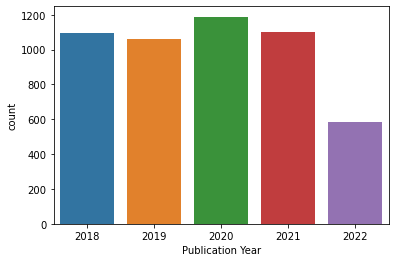

In [11]:
# EDA - Number of publications done in a year (Data: For UNC and affiliates)
d = pd.DataFrame(df_unc, columns=['Publication Year'])
d = d[d['Publication Year'].notna()]
d = d.astype(int) #Publication year is given in float so converted that to int
sb.countplot(x=d['Publication Year'])

In [16]:
# EDA - Number of publications associated with a particular journal (Data: For UNC and affiliates)
print(df_unc['Source Title'].value_counts())

print('\nMost publications in journal: ',df_unc['Source Title'].mode()[0]) #The journal that has the most publications

PLOS ONE                                                                           724
SCIENTIFIC REPORTS                                                                 615
JOURNAL OF CLINICAL ONCOLOGY                                                       522
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA    286
MOLECULAR THERAPY                                                                  156
                                                                                  ... 
BMC NURSING                                                                          1
RESEARCH                                                                             1
ANNUAL REVIEW OF PHARMACOLOGY AND TOXICOLOGY                                         1
ANNUAL REVIEW OF PLANT BIOLOGY, VOL 72, 2021                                         1
ANNUAL REVIEW OF PLANT BIOLOGY, VOL 69                                               1
Name: Source Title, Length: 130, dtype: int

In [17]:
# EDA - The publication most cited in all databases (Data: For UNC and affiliates)
z = pd.DataFrame(df_unc[df_unc['Times Cited, All Databases'] == df_unc['Times Cited, All Databases'].max()]).reset_index()

print("Article title: ",z['Article Title'][0], "\n")
print("Abstract: ",z['Abstract'][0], "\n")

Article title:  Global, regional, and national incidence, prevalence, and years lived with disability for 354 diseases and injuries for 195 countries and territories, 1990-2017: a systematic analysis for the Global Burden of Disease Study 2017 

Abstract:  Background The Global Burden of Diseases, Injuries, and Risk Factors Study 2017 (GBD 2017) includes a comprehensive assessment of incidence, prevalence, and years lived with disability (YLDs) for 354 causes in 195 countries and territories from 1990 to 2017. Previous GBD studies have shown how the decline of mortality rates from 1990 to 2016 has led to an increase in life expectancy, an ageing global population, and an expansion of the non-fatal burden of disease and injury. These studies have also shown how a substantial portion of the world's population experiences non-fatal health loss with considerable heterogeneity among different causes, locations, ages, and sexes. Ongoing objectives of the GBD study include increasing the leve

**NOTE:** Please refer point 2 in documentation for location of below file.

In [18]:
#importing data and determining its shape (Data: For universities of Georgia)
df_georgia = pd.read_csv("EDA/georgiadata.csv")

                                        Affiliations  Count
0                                 Augusta University    374
1                                  Morehouse College      3
2                                   Emory University   3260
3                                  Mercer University     58
4       Philadelphia College of Osteopathic Medicine      0
5   Medical College of Georgia at Augusta University      0
6                       Morehouse School of Medicine     99
7                Emory University School of Medicine      0
8               Mercer University School of Medicine      0
9  Philadelphia College of Osteopathic Medicine -...      0


<BarContainer object of 10 artists>

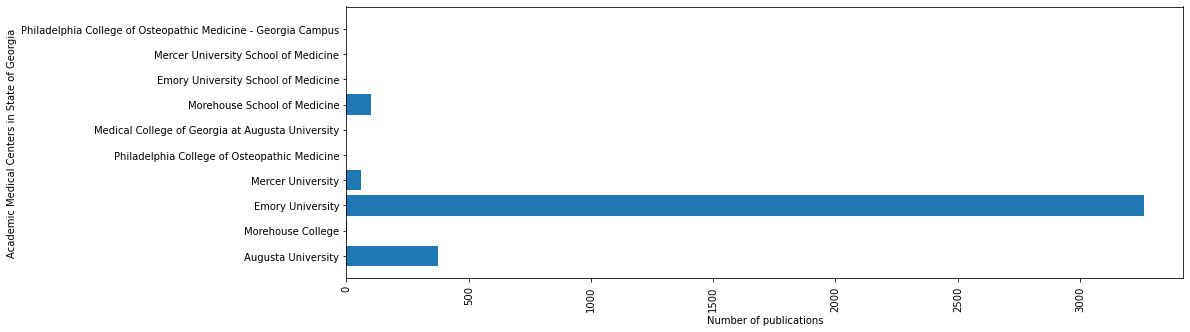

In [19]:
#find out if the mentioned college is in the list of affiliations
uaff = ['Augusta University', 'Morehouse College', 'Emory University', 'Mercer University', 'Philadelphia College of Osteopathic Medicine']
u = {'Augusta University' : 0, 'Morehouse College' : 0, 'Emory University' : 0, 'Mercer University' : 0, 'Philadelphia College of Osteopathic Medicine' : 0}
mcaff = ['Medical College of Georgia at Augusta University', 'Morehouse School of Medicine', 'Emory University School of Medicine', 'Mercer University School of Medicine', 'Philadelphia College of Osteopathic Medicine - Georgia Campus']
mc = {'Medical College of Georgia at Augusta University' : 0, 'Morehouse School of Medicine' : 0, 'Emory University School of Medicine' : 0, 'Mercer University School of Medicine' : 0, 'Philadelphia College of Osteopathic Medicine - Georgia Campus' : 0}
#create dictionaries for the number of times the college is in the affiliations list
for i in df_georgia.Affiliations:
    for j in uaff:
        if j in i:
            u[j] = u[j] + 1            
    for k in mc:
        if k in i:
            mc[k] = mc[k] + 1
#print(u, mc)
#create dataframes of above created dictionaries
university = pd.DataFrame(u, index = ['Count']).transpose()
medical_college = pd.DataFrame(mc, index=['Count']).transpose()
affiliations = pd.concat([university, medical_college])
a = affiliations.reset_index().rename(columns={'index': 'Affiliations'})
print(a)
#creating plot (Data: For universities of Georgia)
fig = plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
plt.xlabel('Number of publications')
plt.ylabel('Academic Medical Centers in State of Georgia')
plt.barh(a.Affiliations, a.Count)

##### Feature engineering

In [20]:
# Creating a column that depicts if the publisher address is in USA (Data: For universities of Georgia)
d = df_georgia.rename(columns={'Publisher Address': 'PubAdd'})
usa = []
for i in range(len(d)):
    if 'USA' in str(d.PubAdd[i]):
        usa.append(1)
    else:
        usa.append(0)

d['USA'] = usa

Text(0.5, 0, 'Articles published')

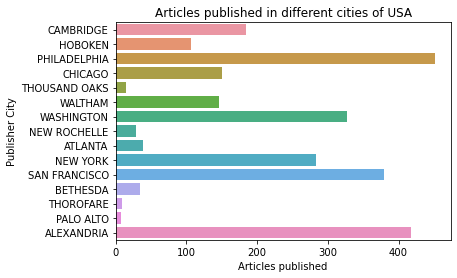

In [21]:
# EDA on publisher cities in USA (Data: For universities of Georgia)
pub_add = d[['Publisher City', 'Publisher', 'USA']]
p = pub_add[pub_add.USA == 1]
ax = sb.countplot(y=p['Publisher City'])
ax.set_title("Articles published in different cities of USA")
ax.set_xlabel("Articles published")

Text(0.5, 0, 'Articles published')

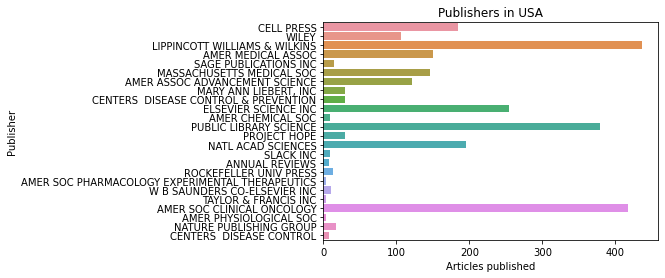

In [22]:
# EDA on publishers in USA (Data: For universities of Georgia)
pub_add = d[['Publisher City', 'Publisher', 'USA']]
p = pub_add[pub_add.USA == 1]
ax = sb.countplot(y=p['Publisher'])
ax.set_title("Publishers in USA")
ax.set_xlabel("Articles published")

Text(0, 0.5, 'No of articles published')

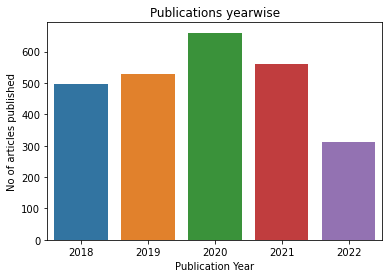

In [23]:
# EDA - Yearwise publication in USA (Data: For universities of Georgia)
d = d[d['Publication Year'].notna()]
d = d[d.USA == 1]
d = d['Publication Year']
d = d.astype(int)
ax = sb.countplot(x=d)
ax.set_title("Publications yearwise")
ax.set_xlabel("Publication Year")
ax.set_ylabel("No of articles published")

### 4. Creating crosswalk

* Used the AMA’s website about medical centers and associated medical schools and programs . https://freida.ama-assn.org/institution?page=1&filter=G (this is the URL or Georgia state as a sample)
* Analysed the structure of web page where is the relevant information about affiliated medical schools are mentioned and address of medical centres are mentioned.
* Created a web-scrapper using selenium to scrap all websites (each of a medical centre) for available information about its address and medical school its affiliated to.
* Created a csv dataset regarding the same (attributes: AMC_No, AMC_Name, URLs, Affiliation_Major, Affiliation_Limited, Affiliation_Graduate, Medical_Center_Address)

**NOTE:** The below code requires a *chromedriver.exe* which is stored in the same folder as this code. Refer point 3 in documentation for more details of its location.

In [1]:
# Importing required libraries for web-scrapping
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import json
import ctypes
from pathlib import Path

##### 4.1 Importing the data downloaded from the AMA website

**NOTE:** The following code cell required raw data files which are stored in the folder *CrosswalkRawData* please refer documentation point 4 for more information on its location.

In [35]:
Arizona = pd.read_csv('CrosswalkRawData/Arizona.csv')
Alabama = pd.read_csv('CrosswalkRawData/Alabama.csv')
Alaska = pd.read_csv('CrosswalkRawData/Alaska.csv')
Arkansas = pd.read_csv('CrosswalkRawData/Arkansas.csv')
California = pd.read_csv('CrosswalkRawData/California.csv')
Colorado = pd.read_csv('CrosswalkRawData/Colorado.csv')
Conneticut = pd.read_csv('CrosswalkRawData/Connecticut.csv')
Delaware = pd.read_csv('CrosswalkRawData/Delaware.csv')
Doc = pd.read_csv('CrosswalkRawData/District_of_Columbia.csv')
Florida = pd.read_csv('CrosswalkRawData/Florida.csv')
Idaho = pd.read_csv('CrosswalkRawData/Idaho.csv')
Illinois = pd.read_csv('CrosswalkRawData/Illinois.csv')
Indiana = pd.read_csv('CrosswalkRawData/Indiana.csv')
Iowa = pd.read_csv('CrosswalkRawData/Iowa.csv')
Kansas = pd.read_csv('CrosswalkRawData/Kansas.csv')
Kentucky = pd.read_csv('CrosswalkRawData/Kentucky.csv')
Hawaii = pd.read_csv('CrosswalkRawData/Hawaii.csv')
Louisiana = pd.read_csv('CrosswalkRawData/Louisiana.csv')
Maine = pd.read_csv('CrosswalkRawData/Maine.csv')
Maryland = pd.read_csv('CrosswalkRawData/Maryland.csv')
Massachusetts = pd.read_csv('CrosswalkRawData/Massachusetts.csv')
Michigan = pd.read_csv('CrosswalkRawData/Michigan.csv')
Minnesota = pd.read_csv('CrosswalkRawData/Minnesota.csv')
Mississippi = pd.read_csv('CrosswalkRawData/Mississippi.csv')
Missouri = pd.read_csv('CrosswalkRawData/Missouri.csv')
Nebraska = pd.read_csv('CrosswalkRawData/Nebraska.csv')
Nevada = pd.read_csv('CrosswalkRawData/Nevada.csv')
New Hampshire = pd.read_csv('CrosswalkRawData/New Hampshire.csv')
New Jersey = pd.read_csv('CrosswalkRawData/New Jersey.csv')
New York = pd.read_csv('CrosswalkRawData/New York.csv')
North Carolina = pd.read_csv('CrosswalkRawData/North Carolina.csv')
North Dakota = pd.read_csv('CrosswalkRawData/North Dakota.csv')
Ohio = pd.read_csv('CrosswalkRawData/Ohio.csv')
Oklahoma = pd.read_csv('CrosswalkRawData/Oklahoma.csv')
Oregon = pd.read_csv('CrosswalkRawData/Oregon.csv')
Pennsylvania = pd.read_csv('CrosswalkRawData/Pennsylvania.csv')
PueroRico= pd.read_csv('CrosswalkRawData/Puerto Rico.csv')
RhodeIsland = pd.read_csv('CrosswalkRawData/Rhode Island.csv')
SouthCarolina = pd.read_csv('CrosswalkRawData/South Carolina.csv')
SouthDakota = pd.read_csv('CrosswalkRawData/South Dakota.csv')
Tennesse = pd.read_csv('CrosswalkRawData/Tennesse.csv')
Texas = pd.read_csv('CrosswalkRawData/Texas.csv')
Utah = pd.read_csv('CrosswalkRawData/Utah.csv')
Vermont = pd.read_csv('CrosswalkRawData/Vermont.csv')
Virginia = pd.read_csv('CrosswalkRawData/Virginia.csv')
Washington = pd.read_csv('CrosswalkRawData/Washington.csv')
WestVirginia = pd.read_csv('CrosswalkRawData/WestVirginia.csv')
Wisconsin = pd.read_csv('CrosswalkRawData/Wisconsin.csv')
Wyoming = pd.read_csv('CrosswalkRawData/Wyoming.csv')

states = [Alaska, Arkansas, California, Colorado, Conneticut, Delaware, Doc, Florida, Idaho, Illinois, Indiana, 
          Iowa, Kansas, Kentucky, Hawaii, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi,
          Missouri,Nebraska, Nevada, Newyork, NewHampshire, NorthCarolina, Ohio, Oklahoma, Oregon, Pennsylvania, 
          PuertoRico,RhodeIsland, SouthCarolina, SouthDakota, Tennesse, Texas, Utah, Vermont, Virginia, Washington,WestVirginia,
          Wisconsin, Wyoming]
state_name = ['Alaska', 'Arkansas', 'California', 'Colorado', 'Conneticut', 'Delaware', 'Doc', 'Florida', 'Idaho', 
              'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Hawaii', 'Louisiana', 'Maine', 'Maryland',
              'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'Newyork', 
              'NewHampshire', 'NorthCarolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'PuertoRico', 'RhodeIsland', 
              'South Carolina', 'SouthDakota', 'Tennesse', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington','WestVirginia', 'Wisconsin',
              'Wyoming']

##### 4.2 Creating driversetup and pagesource functions

In [27]:
def driversetup():
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument("enable-automation")
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-browser-side-navigation")
    options.add_argument("--disable-gpu")
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")
    driver = webdriver.Chrome(options=options)
    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")
    return driver

def pagesource(url, driver):
    driver = driver
    driver.get(url)
    time.sleep(7)
    soup = BeautifulSoup(driver.page_source)
    return soup

##### 4.3 Getting/ Creating URLs for all entries obtained from AMA website (using AMC_no and AMC_name) and fetching the data, creating individual csvs for each state.

In [39]:
for j in range(len(states)):
    print('----------',state_name[j],'----------')
    hospitals = states[j]
    hospitals = hospitals[hospitals['AMC_No'].notna()]
    hospitals['AMC_No'] = hospitals["AMC_No"].astype(int)
    baseurl = 'https://freida.ama-assn.org/institution/'
    URLS = []
    for index, i in hospitals.iterrows():
        if hospitals['AMC_No'][j] < 100000:
#             print(hospitals['AMC_No'][j], ' is less than 100000.')
            URLS.append(str(baseurl + '0' + str(i['AMC_No'])))
#             print(URLS[j])
        else:
            URLS.append(str(baseurl + str(i['AMC_No'])))
    hospitals['URLS'] = URLS
#     print(len(hospitals), hospitals.head())
    
    mc = []
    grad = []
    mcl = []
    add = []
    d = driversetup()
    for index, i in hospitals.iterrows():
        url = i['URLS']
        s = pagesource(url, d)
        med_school = list(s.findAll('small', class_="bold"))
        address = list(s.findAll('div', class_="details__address ng-star-inserted")) 
        if len(med_school) == 0:
            mc.append("")
            mcl.append("")
            grad.append("")
        elif len(med_school) == 1:
            a = list(s.findAll('div', class_="medical-schools__school ng-star-inserted"))
            name = a[0].findAll('small', class_='bold')[0].text
            relationship = a[0].findAll('div', class_='')[0].text
            if 'Limited' in relationship:
                mcl.append(name)
                mc.append("")
                grad.append("")
            elif 'Major' in relationship:
                mc.append(name)
                mcl.append("")
                grad.append("")
            elif 'Graduate' in relationship:
                mc.append("")
                mcl.append("")
                grad.append(name)
            else:
                print("NEW RELATIONSHIP FOUND : ", name)
                break
        elif len(med_school) > 1:   
            major = []
            limited = []
            graduate = []
            a = list(s.findAll('div', class_="medical-schools__school ng-star-inserted"))
            for i in range(len(a)):
                name = a[i].findAll('small', class_='bold')[0].text
                relationship = a[i].findAll('div', class_='')[0].text
                if 'Limited' in relationship:
                    limited.append(name)
                elif 'Graduate' in relationship:
                    graduate.append(name)
                elif 'Major' in relationship:
                    major.append(name)
                else:
                    print("New relationship found")
                    break 
            if major == []:
                major = ''
            if limited == []:
                limited = ''
            if graduate == []:
                graduate = ''
            mc.append(major)
            mcl.append(limited)
            grad.append(graduate)
        if len(address) != 0:
            address[0].br.string = ', '
            add.append(address[0].text)
        else:
            add.append("")
            print(index, 'mc', len(mc), mc[index], 'mcl', len(mcl), mcl[index], 'grad', len(grad), grad[index], 'add', len(add), add[index])
        if len(mc) > (index+1):
            break
    
    print(len(mc),len(mcl),len(grad),len(add))
    hospitals['Affiliation_Major'] = mc
    hospitals['Affiliation_Limited'] = mcl
    hospitals['Affiliation_Graduate'] = grad
    hospitals['Medical_Center_Address'] = add 
    Path("Crosswalk_data").mkdir(parents=True, exist_ok=True)
    filename = 'Crosswalk_data\\' + state_name[j] + '_crosswalk.csv'
    hospitals.to_csv(filename)


---------- Alaska ----------
9 9 9 9
---------- Arkansas ----------


KeyboardInterrupt: 

**NOTE:** The result data files generated for each state have already been created and stored in folder *CrosswalkData*, for more information on its location please refer documentation point 5.

**NOTE:** The above cell output may show a *KeyboardInterrupt* error, this doesnot indicate any issues with the code, the run of the code was interrupted as the files have already been created hence omitting re-fetching of the files.

### 5. Downloading bibliographic data of articles from PubMed

In [40]:
# Install and import pymed module
!pip install pymed
from pymed import PubMed

**Note:** The below code may give a HTTP error (400, 429, etc). This is usually because of rare delayed response of API and query overload, in such a case kindly adjust the variable k as 1 more than the index of last csv completed, i.e. k equals the index of the university we want to start fetching data from. A sleep timer has been created after every iteration of the code to reduce the possibility of occurence of these errors.

**NOTE:** Line 3 of this code requires the user to enter their email id for data fetch. (This doesn't require any user registration on any portal)

**NOTE:** The below code requires to read files *universities.csv* and *journals.csv*, both the files are saved in folder PubmedRawData. Please refer to point 6 of documentation for further information on files' location.

**NOTE:** The below code creates result files for each university it fetches data for, all those created result files are stored in *PubmedFinalData* folder. Please refer to point 7 of documentation for further information on files' location.

In [44]:
# Pymed
# Insert your email id in the field given below
pubmed = PubMed(tool="MyTool", email="----insert-your-email----")

# import the US AMC University List data
u = pd.read_csv('PubmedRawData/universities.csv')

# Date attributes in query
date = '("2000/01/01"[Date - Publication] : "2014/12/31"[Date - Publication])'
journals = pd.read_csv('PubmedRawData/journals.csv')

# initialize a dataframe : 
art = pd.DataFrame()

# query and fetch data for each university out of the listed universities
k = 0
while k < len(u):
    temp = pd.DataFrame() 
    print(k, u.Universities[k].upper())
    y = 0
  
    while y < 141:
        # extracting for 5 journals at a time to decrease the number of queries and hence iterations
        journal_query = '('
        journal_query += '(' + str(journals.Title[y]).upper() + '[JOURNAL])' + ' OR ' + '(' + str(journals.Title[y+1]).upper() + '[JOURNAL])' + ' OR ' + '(' + str(journals.Title[y+2]).upper() + '[JOURNAL])' + ' OR ' + '(' + str(journals.Title[y+3]).upper() + '[JOURNAL])' + ' OR ' + '(' + str(journals.Title[y+4]).upper() + '[JOURNAL])' + ' OR '
        query = journal_query[:-4] +') AND ' + date + ' AND ('+ u.Universities[k].upper() + '[AFFILIATION])'
        # no more than 3 requests in a second
        time.sl1)
        results = list(pubmed.query(query, max_results=50000))

        # article_dict = {}
        article_dict_list = []

        # Loop over the retrieved articles
        for i, article in enumerate(results):
            article_dict = {}
            if not article.abstract:
                pass 
            else:
                article_dict['Abstract'] = article.abstract
                try:
                    article_dict["Conclusions"]= article.conclusions
                except:
                    article_dict["Conclusions"]= 'None'
                article_dict["Copyrights"] = article.copyrights
                article_dict["DOI"] = article.doi
                try:
                    article_dict["Journal"] = article.journal
                except:
                    article_dict["Journal"] ='None'
                try:
                    article_dict["Methods"] = article.methods
                except:
                    article_dict["Methods"]='None'
                article_dict["Publication_date"] = article.publication_date
                article_dict["PubmedID"]= article.pubmed_id
                try:
                    article_dict["Results"]=article.results
                except:
                    article_dict["Results"]='None'
                article_dict["Title"] = article.title
                try:
                    article_dict["Keywords"] = '; '.join(article.keywords) 
                except:
                    article_dict["Keywords"] = "None"
                authors = []
                affils = []
                for a,author in enumerate(article.authors):
                    # print(article.authors)
                    auth = []
                    auth.append(author['lastname'])
                    auth.append(author['firstname'])
                    auth.append(author['initials'])
                    author_name = ', '.join(str(x) for x in auth)
                    authors.append(author_name)

                    try:
                        if author['affiliation']!= None:
                            affils.append(author['affiliation'])
                        else:
                            affils.append('None')
                    except:
                        affils.append('None')


                article_dict["Authors"] = '; '.join(authors) 
                article_dict["Affiliations"] = '; '.join(affils) 
                article_dict_list.append(article_dict)
        y = y + 5
#         print(len(article_dict_list), ' results appending to art dataframe', u.Universities[k].upper())
        temp = pd.concat([temp, pd.DataFrame(article_dict_list)])
    art = pd.concat([art, temp])
    print('-----> File created for ', u.Universities[k].upper()) 
    if temp.empty:
        print('Dataframe is empty')
    else:
        temp.drop_duplicates(subset=['Title', 'Abstract'], inplace=True)
        Path("PubmedFinaldata").mkdir(parents=True, exist_ok=True)
        filename = 'PubmedFinaldata\\{0}_FULLRECORD.CSV'.format(u.Universities[k].upper())
        temp.to_csv(filename, index=False)
    k = k + 1
    time.sleep(10)

0 UNIVERSITY OF ALABAMA AT BIRMINGHAM
29  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
34  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
4  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
42  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
16  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
13  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
6  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
7  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
3  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
19  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
3  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
26  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIRMINGHAM
33  results appending to art dataframe UNIVERSITY OF ALABAMA AT BIR

HTTPError: 400 Client Error: Bad Request for url: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?tool=MyTool&email=bkkashyapbhavya97%40gmail.com&db=pubmed&id=19010527&retmode=xml

**NOTE:** The above cell output may show a *KeyboardInterrupt* error, this doesnot indicate any issues with the code, the run of the code was interrupted as the files have already been created hence omitting re-fetching of the files.